# Matan_Shpigel_Mini Project – Laptop Price Analysis

This project analyzes laptop prices using the laptop_price dataset.
The analysis includes price distribution, company-wise comparison,
operating systems analysis, and relationships between hardware features and price.

In [26]:
!pip install pandas matplotlib


In [85]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("laptop_price - dataset.csv")

In [86]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [87]:
df.shape

(1275, 15)

In [88]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'CPU_Company', 'CPU_Type', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory',
       'GPU_Company', 'GPU_Type', 'OpSys', 'Weight (kg)', 'Price (Euro)'],
      dtype='object')

## Task 1 – Laptop Prices Distribution

In this task, we plot the prices of all laptops in the dataset.
Each point represents the price of one laptop.
This plot helps us understand the overall price range and variability.

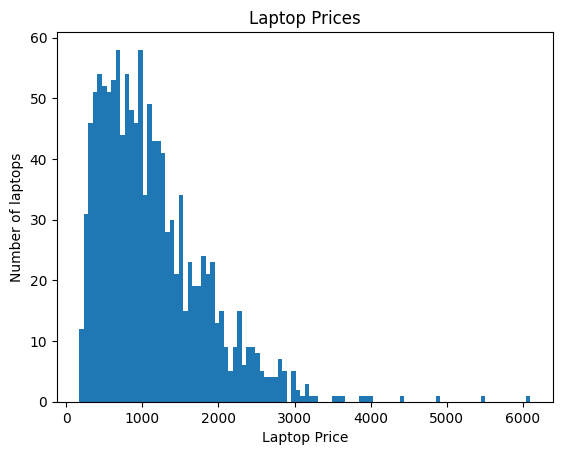

In [89]:
prices = df['Price (Euro)']

plt.hist(prices, bins=100)
plt.title("Laptop Prices")
plt.xlabel("Laptop Price")
plt.ylabel("Number of laptops")
plt.show()

## Task 2 – Average Laptop Price by Company

In this task, we calculate the average laptop price for each company.
We then identify which company has the highest average price.

In [90]:
avg_price_by_company = df.groupby('Company')['Price (Euro)'].mean()
avg_price_by_company

Company
Acer          633.464455
Apple        1564.198571
Asus         1123.829737
Chuwi         314.296667
Dell         1199.225120
Fujitsu       729.000000
Google       1677.666667
HP           1080.314664
Huawei       1424.000000
LG           2099.000000
Lenovo       1093.862215
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price (Euro), dtype: float64

In [127]:
print(avg_price_by_company.idxmax())
avg_price_by_company.max()

Razer


np.float64(3346.1428571428573)

From the results above, **Razer** has the highest average laptop price, 
with an average price of approximately **€3346**.

## Task 3 – Operating Systems
In this task, I examined the OpSys column and identified multiple operating systems written in different formats.

In [159]:
set(df['OpSys'])

{'Android',
 'Chrome OS',
 'Linux',
 'Mac OS X',
 'No OS',
 'Windows 10',
 'Windows 10 S',
 'Windows 7',
 'macOS'}

I standardized the operating system names by unifying different versions of Windows and macOS
into single categories, while keeping Linux, Chrome OS, No OS, and Android as separate categories.
This preprocessing step ensures consistency for further analysis.

In [161]:
df['OpSys_clean'] = df['OpSys']
df.loc[df['OpSys_clean'].str.contains('Windows', na=False), 'OpSys_clean'] = 'Windows'
df.loc[df['OpSys_clean'].str.contains('Mac', na=False), 'OpSys_clean'] = 'MacOS'
df['OpSys_clean'].value_counts()

OpSys_clean
Windows      1101
No OS          66
Linux          58
Chrome OS      27
macOS          13
MacOS           8
Android         2
Name: count, dtype: int64

## Task 4 – Operating Systems and Price Distributions

After cleaning and unifying the operating system names, I analyzed the price distributions
for each operating system category.  
The histograms show how laptop prices are distributed within each OS group.

Windows laptops show a wide price range with a large concentration in the lower to mid-price range,
while macOS laptops tend to be more expensive on average.
Linux and No OS laptops appear mostly in the lower price ranges, likely targeting budget users

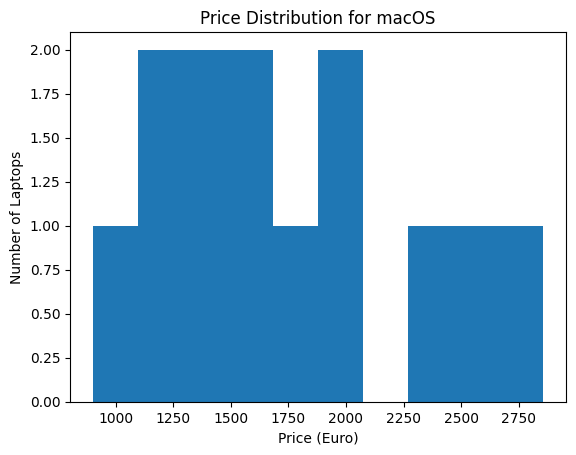

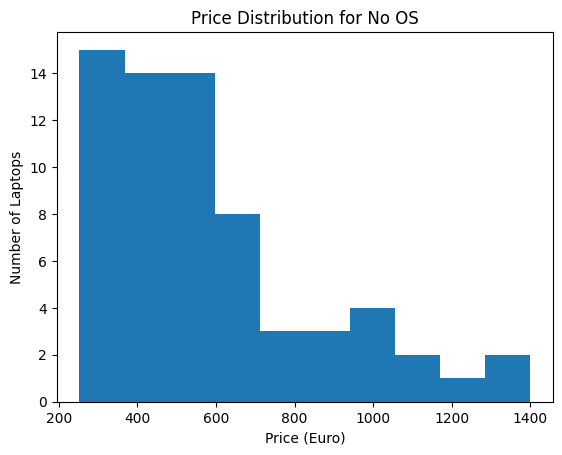

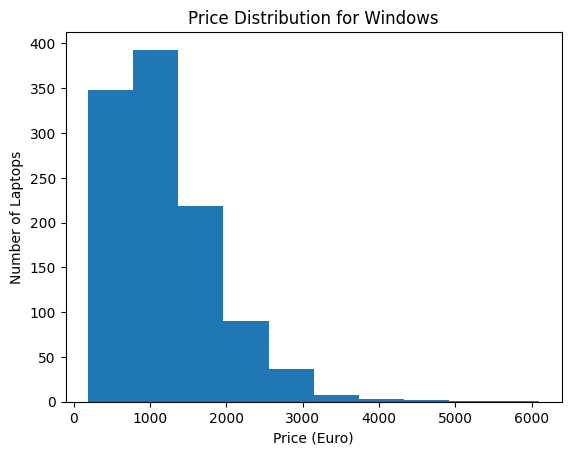

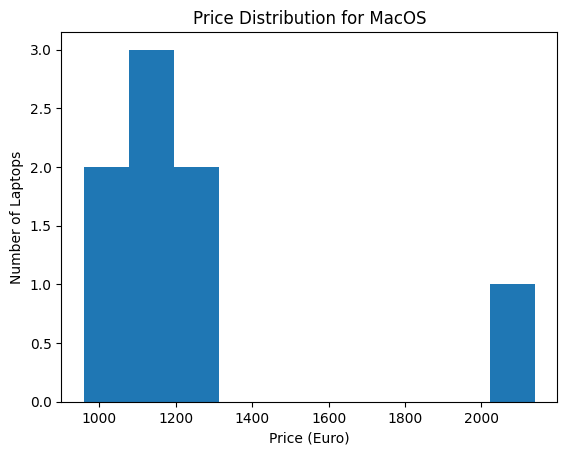

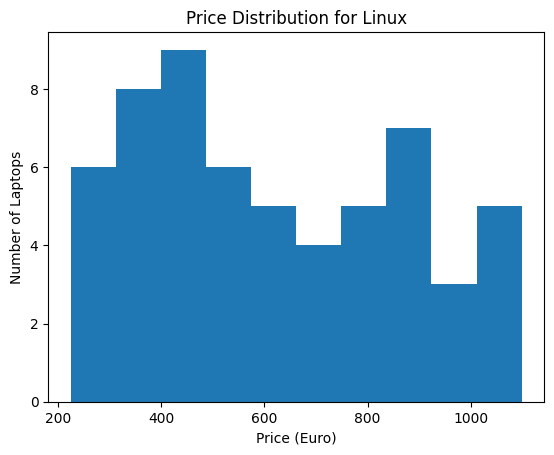

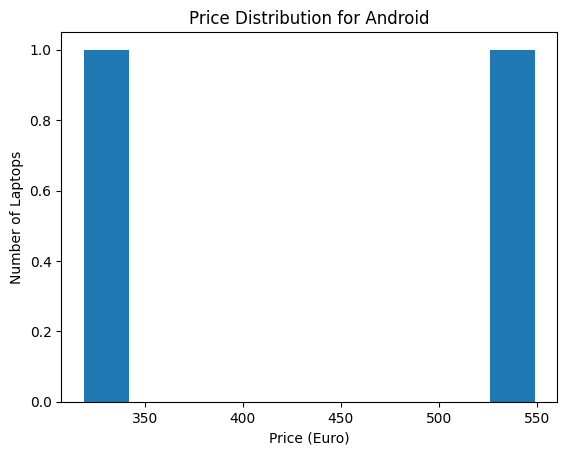

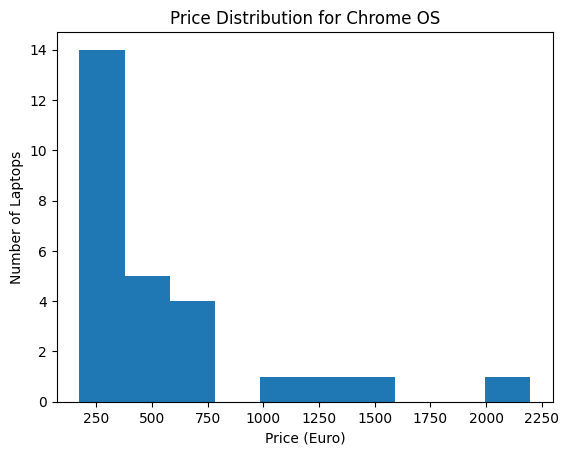

In [178]:
os_types = df['OpSys_clean'].unique()

for os in os_types:
    prices = df[df['OpSys_clean'] == os]['Price (Euro)']

    plt.figure()
    plt.hist(prices)
    plt.title(f'Price Distribution for {os}')
    plt.xlabel('Price (Euro)')
    plt.ylabel('Number of Laptops')
    plt.show()

## Task 5 – Relationship between RAM and Price

To examine the relationship between RAM and laptop price, I used a scatter plot.
The plot shows a clear positive relationship: laptops with higher RAM tend to be more expensive.


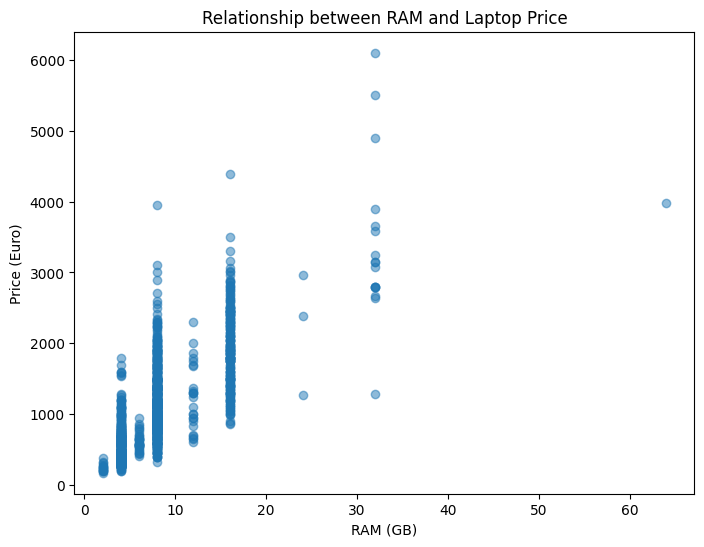

In [185]:
plt.figure(figsize=(8,6))
plt.scatter(df['RAM (GB)'], df['Price (Euro)'], alpha=0.5)

plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euro)')
plt.title('Relationship between RAM and Laptop Price')

plt.show()

Outliers were detected using the IQR method.
Prices significantly higher or lower than the typical range were considered outliers.
These extreme values may represent premium models or budget devices and can affect the analysis.

In [ ]:
Q1 = df['Price (Euro)'].quantile(0.25)
Q3 = df['Price (Euro)'].quantile(0.75)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

outliers = df[(df['Price (Euro)'] > upper_bound) | (df['Price (Euro)'] < lower_bound)]

len(outliers)



28

Plot again with scatter plot after removing outline.This indicates that there is no strong correlation between the variables.

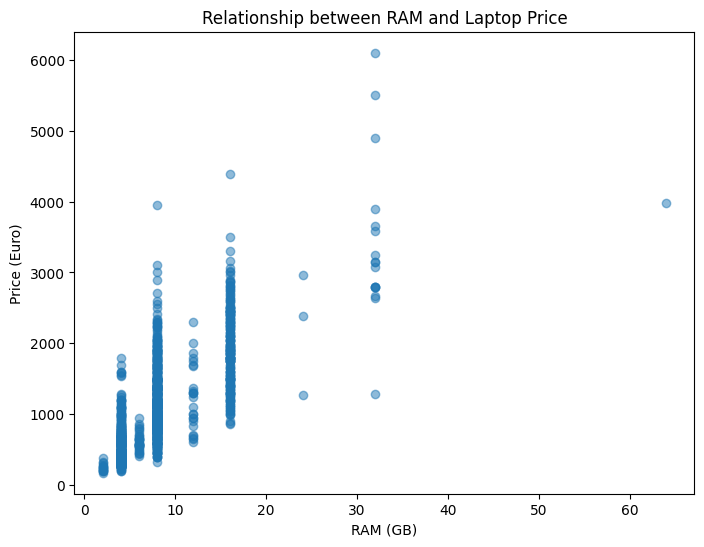

In [ ]:
df_without_outliers=df[(df['Price (Euro)'] <= upper_bound) & (df['Price (Euro)'] >= lower_bound)]

plt.figure(figsize=(8,6))
plt.scatter(df['RAM (GB)'], df['Price (Euro)'], alpha=0.5)

plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euro)')
plt.title('Relationship between RAM and Laptop Price')

plt.show()

## Task 6 – Storage Type Extraction

In this task, I created a new column called **Storage type** by extracting the storage technology
(SSD, HDD, or Flash Storage) from the **Memory** column.

This transformation simplifies further analysis by separating storage capacity from storage technology

In [197]:
df["Memory"].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [201]:
def extract_storage_type(memory):
    if 'SSD' in memory:
        return 'SSD'
    elif 'Hybrid' in memory:
        return 'Hybrid'
    elif 'HDD' in memory:
        return 'HDD'
    elif 'Flash' in memory:
        return 'Flash Storage'
    else:
        return 'Other'
    

df['Storage type'] = df['Memory'].apply(extract_storage_type)

df[['Memory', 'Storage type']].head()

,Memory,Storage type
0,128GB SSD,SSD
1,128GB Flash Storage,Flash Storage
2,256GB SSD,SSD
3,512GB SSD,SSD
4,256GB SSD,SSD
